In [36]:
# Importing the core libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Importing the dataset into relevant matrices and vectors
dataset = pd.read_csv('Dataset.csv')
dataset['Gender'].replace('Male', 0, inplace = True)
dataset['Gender'].replace('Female', 1, inplace = True)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [38]:
# Making training and testing sets
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, 4].values
dataset.iloc[:, [1, 2, 3]].head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [41]:
# Fitting algorithms to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', cache_size = 7000)
classifier.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [43]:
# Finding the model's accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9375


In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[44,  4],
       [ 1, 31]])

In [45]:
# Decision Boundary Function
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        c_test = [colors[i] for i in y_test]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=c_test,
                    edgecolor='black',
                    alpha=0.8,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

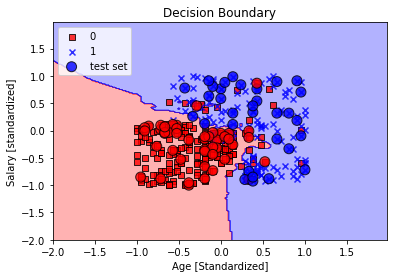

In [46]:
# Plotting our Decision Boundary
X_train_std = X_train[:, 1:]
X_test_std  = X_test[:, 1:]

knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train_std, y_train)

X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

X_test_start = len(X_train_std)
X_test_end = len(X_train_std) + len(X_test_std)

plot_decision_regions(X_combined, y_combined, 
                      classifier = knn_model, test_idx = range(X_test_start, X_test_end))

plt.title('Decision Boundary')
plt.xlabel('Age [Standardized]')
plt.ylabel('Salary [standardized]')
plt.legend(loc='upper left')